# **DATA PREPROCESSING**
Memuat dataset dan melakukan pembersihan serta menjelajahi dataset untuk memahami distribusi dan pola-pola utama.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Sales and Profit Analysis for Corporate Customers/Mithilesh_Kale_superstore_sales_project-_3_.csv')

# Melihat beberapa baris pertama dataset
df.head()

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Base Margin,Ship Date
0,3,10/13/2010,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,0.80,10/20/2010
1,293,10/1/2012,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,0.58,10/2/2012
2,293,10/1/2012,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,0.39,10/3/2012
3,483,7/10/2011,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,0.58,7/12/2011
4,515,8/28/2010,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,0.50,8/30/2010


In [3]:
# Memeriksa informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order ID              8399 non-null   int64  
 1   Order Date            8399 non-null   object 
 2   Order Priority        8399 non-null   object 
 3   Order Quantity        8399 non-null   int64  
 4   Sales                 8399 non-null   float64
 5   Discount              8399 non-null   float64
 6   Ship Mode             8399 non-null   object 
 7   Profit                8399 non-null   float64
 8   Unit Price            8399 non-null   float64
 9   Shipping Cost         8399 non-null   float64
 10  Customer Name         8399 non-null   object 
 11  Province              8399 non-null   object 
 12  Region                8399 non-null   object 
 13  Customer Segment      8399 non-null   object 
 14  Product Category      8399 non-null   object 
 15  Product Sub-Category 

In [4]:
# Memeriksa nilai yang hilang
df.isnull().sum()

# Menghapus baris dengan nilai yang hilang
df.dropna(inplace=True)

In [5]:
# Memeriksa duplikat
df.duplicated().sum()

# Menghapus duplikat
df.drop_duplicates(inplace=True)

In [6]:
# Memeriksa kembali informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8336 entries, 0 to 8398
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order ID              8336 non-null   int64  
 1   Order Date            8336 non-null   object 
 2   Order Priority        8336 non-null   object 
 3   Order Quantity        8336 non-null   int64  
 4   Sales                 8336 non-null   float64
 5   Discount              8336 non-null   float64
 6   Ship Mode             8336 non-null   object 
 7   Profit                8336 non-null   float64
 8   Unit Price            8336 non-null   float64
 9   Shipping Cost         8336 non-null   float64
 10  Customer Name         8336 non-null   object 
 11  Province              8336 non-null   object 
 12  Region                8336 non-null   object 
 13  Customer Segment      8336 non-null   object 
 14  Product Category      8336 non-null   object 
 15  Product Sub-Category  8336

In [7]:
# Statistik deskriptif
df.describe()

,Order ID,Order Quantity,Sales,Discount,Profit,Unit Price,Shipping Cost,Product Base Margin
count,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000
mean,29974.350408,25.573896,1757.100276,0.049616,178.411591,88.716087,12.717320,0.512513
std,17256.903785,14.494657,3576.433039,0.031809,1192.010746,291.195650,17.200793,0.135589
min,3.000000,1.000000,2.240000,0.000000,-14140.700000,0.990000,0.490000,0.350000
25%,15033.750000,13.000000,141.971625,0.020000,-83.205000,6.480000,3.140000,0.380000
50%,29858.500000,26.000000,442.740000,0.050000,-1.735000,20.980000,6.050000,0.520000
75%,44609.250000,38.000000,1678.515000,0.080000,159.802500,85.990000,13.990000,0.590000
max,59973.000000,50.000000,89061.050000,0.250000,27220.690000,6783.020000,164.730000,0.850000


# **ANALISIS DESKRIPTIF**
Menganalisis data secara deskriptif untuk mendapatkan wawasan dasar.

In [16]:
# Total penjualan dan laba
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

print(f'Total Sales: {total_sales}')
print(f'Total Profit: {total_profit}')

Total Sales: 14647187.904000001
Total Profit: 1487239.02


In [15]:
# Rata-rata penjualan dan laba per pesanan
average_sales_per_order = df.groupby('Order ID')['Sales'].sum().mean()
average_profit_per_order = df.groupby('Order ID')['Profit'].sum().mean()

print(f'Rata-rata Sales per Pesanan: {average_sales_per_order}')
print(f'Rata-rata Profit per Pesanan: {average_profit_per_order}')

Rata-rata Sales per Pesanan: 2675.774187796858
Rata-rata Profit per Pesanan: 271.69145414687614


# **Analisis Segmen Pelanggan**
Bagaimana pendapatan dan laba berbeda-beda segmen pelanggan.

In [21]:
# Pendapatan dan laba per segmen pelanggan
segment_sales = df.groupby('Customer Segment')['Sales'].sum().reset_index()
segment_profit = df.groupby('Customer Segment')['Profit'].sum().reset_index()

print(segment_sales)
print(segment_profit)

  Customer Segment         Sales
0         Consumer  3.008853e+06
1        Corporate  5.384636e+06
2      Home Office  3.518088e+06
3   Small Business  2.735611e+06
  Customer Segment     Profit
0         Consumer  277316.30
1        Corporate  595379.54
2      Home Office  308551.70
3   Small Business  305991.48


# **Analisis Produk**
Analisis kategori dan sub-kategori produk yang paling menghasilkan.

In [20]:
# Pendapatan dan laba per kategori produk
category_sales = df.groupby('Product Category')['Sales'].sum().reset_index()
category_profit = df.groupby('Product Category')['Profit'].sum().reset_index()

print(category_sales)
print(category_profit)

  Product Category        Sales
0        Furniture  4952119.462
1  Office Supplies  3710820.260
2       Technology  5984248.182
  Product Category     Profit
0        Furniture   75968.73
1  Office Supplies  524956.77
2       Technology  886313.52


In [12]:
# Pendapatan dan laba per sub-kategori produk
subcategory_sales = df.groupby('Product Sub-Category')['Sales'].sum().reset_index()
subcategory_profit = df.groupby('Product Sub-Category')['Profit'].sum().reset_index()

print(subcategory_sales)
print(subcategory_profit)

              Product Sub-Category        Sales
0                       Appliances   736991.540
1   Binders and Binder Accessories  1022957.590
2                        Bookcases   814425.900
3               Chairs & Chairmats  1652823.000
4             Computer Peripherals   795875.940
5                  Copiers and Fax  1130361.300
6                        Envelopes   174085.800
7                           Labels    38981.550
8               Office Furnishings   698093.810
9                  Office Machines  2168697.140
10                           Paper   446452.860
11             Pens & Art Supplies   167107.220
12                    Rubber Bands    15006.630
13   Scissors, Rulers and Trimmers    80996.310
14          Storage & Organization  1028240.760
15                          Tables  1786776.752
16    Telephones and Communication  1889313.802
              Product Sub-Category     Profit
0                       Appliances   97158.06
1   Binders and Binder Accessories  307413.3

# **Analisis Metode Pengiriman**
Bagaimana metode pengiriman mempengaruhi pendapatan dan laba.

In [22]:
# Pendapatan dan laba per metode pengiriman
ship_mode_sales = df.groupby('Ship Mode')['Sales'].sum().reset_index()
ship_mode_profit = df.groupby('Ship Mode')['Profit'].sum().reset_index()

print(ship_mode_sales)
print(ship_mode_profit)

        Ship Mode        Sales
0  Delivery Truck  6107421.188
1     Express Air  1149286.727
2     Regular Air  7390479.989
        Ship Mode      Profit
0  Delivery Truck   255092.23
1     Express Air   145877.97
2     Regular Air  1086268.82


# **Analisis Waktu**
Analisis tren penjualan dan laba seiring waktu.

In [23]:
# Mengubah Order Date menjadi datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Mengekstrak tahun dan bulan dari Order Date
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [24]:
# Tren penjualan per tahun
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()
yearly_profit = df.groupby('Year')['Profit'].sum().reset_index()

print(yearly_sales)
print(yearly_profit)

   Year         Sales
0  2009  4.113376e+06
1  2010  3.516934e+06
2  2011  3.334364e+06
3  2012  3.682515e+06
   Year     Profit
0  2009  418475.53
1  2010  356125.53
2  2011  376026.63
3  2012  336611.33


In [26]:
# Tren penjualan per bulan
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
print(monthly_sales)

    Year  Month        Sales
0   2009      1  508776.0895
1   2009      2  329934.7465
2   2009      3  411628.7290
3   2009      4  383717.8320
4   2009      5  204182.4980
5   2009      6  253854.1280
6   2009      7  376558.0200
7   2009      8  326342.6350
8   2009      9  307873.8245
9   2009     10  353623.5365
10  2009     11  241074.1960
11  2009     12  415809.3505
12  2010      1  336526.6805
13  2010      2  271580.5080
14  2010      3  208906.2265
15  2010      4  266968.5890
16  2010      5  283534.2850
17  2010      6  292340.1750
18  2010      7  227496.1985
19  2010      8  207937.0090
20  2010      9  416858.2185
21  2010     10  364354.5650
22  2010     11  281563.0755
23  2010     12  358868.3040
24  2011      1  251467.2280
25  2011      2  298672.3710
26  2011      3  262800.4710
27  2011      4  281417.1970
28  2011      5  260283.1300
29  2011      6  188753.4655
30  2011      7  286019.7765
31  2011      8  254143.4095
32  2011      9  269918.2560
33  2011     1

In [27]:
# Tren penjualan per bulan
monthly_profit = df.groupby(['Year', 'Month'])['Profit'].sum().reset_index()
print(monthly_profit)

    Year  Month    Profit
0   2009      1  61517.62
1   2009      2  30744.19
2   2009      3  22802.96
3   2009      4  36978.66
4   2009      5  10416.86
5   2009      6  32211.96
6   2009      7  40718.11
7   2009      8  14443.61
8   2009      9  47626.52
9   2009     10  53355.93
10  2009     11  15015.60
11  2009     12  52643.51
12  2010      1  48177.27
13  2010      2  25999.13
14  2010      3  -1678.68
15  2010      4  17306.51
16  2010      5  42636.66
17  2010      6  36041.36
18  2010      7  15329.07
19  2010      8  21862.78
20  2010      9  49997.41
21  2010     10  48469.58
22  2010     11  20881.71
23  2010     12  31102.73
24  2011      1  17704.56
25  2011      2  20565.74
26  2011      3  49543.11
27  2011      4  36814.03
28  2011      5  25676.63
29  2011      6  17434.74
30  2011      7  37428.58
31  2011      8  20441.22
32  2011      9  31253.05
33  2011     10  49010.57
34  2011     11  32154.59
35  2011     12  37999.81
36  2012      1  39047.70
37  2012    

# **Visualisasi Data**

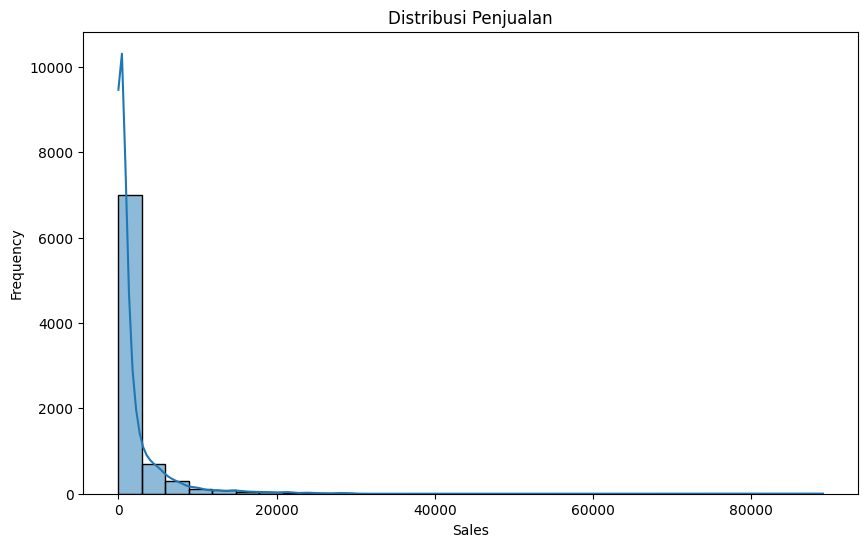

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribusi penjualan
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distribusi Penjualan')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


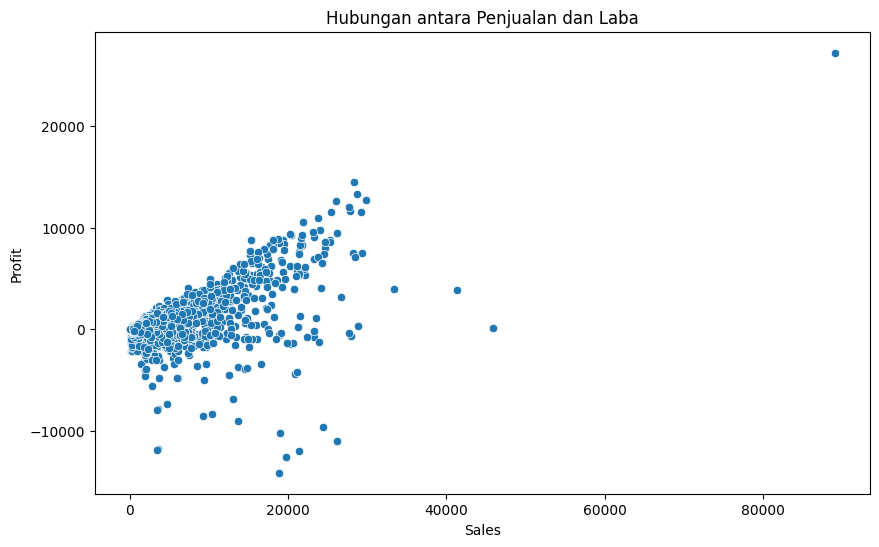

In [32]:
# Hubungan antara penjualan dan laba
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Hubungan antara Penjualan dan Laba')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

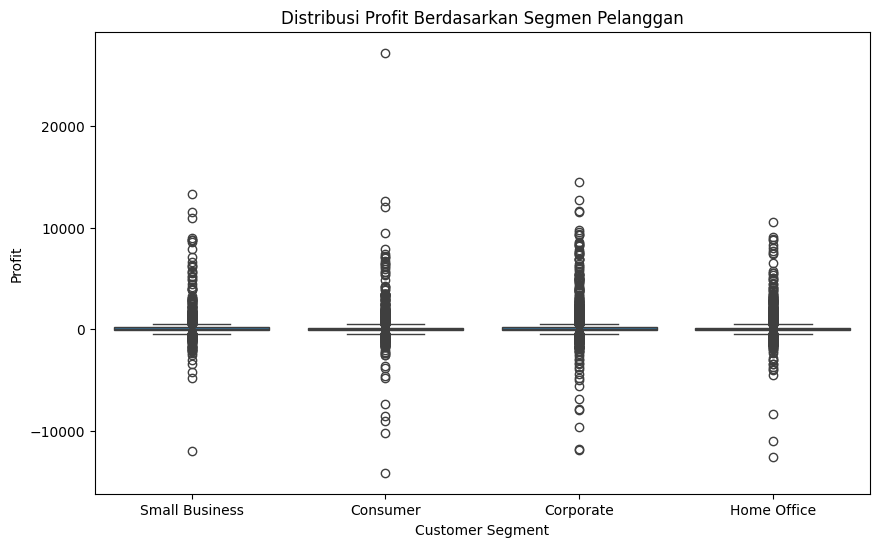

In [33]:
# Distribusi profit berdasarkan segmen pelanggan
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer Segment', y='Profit', data=df)
plt.title('Distribusi Profit Berdasarkan Segmen Pelanggan')
plt.xlabel('Customer Segment')
plt.ylabel('Profit')
plt.show()

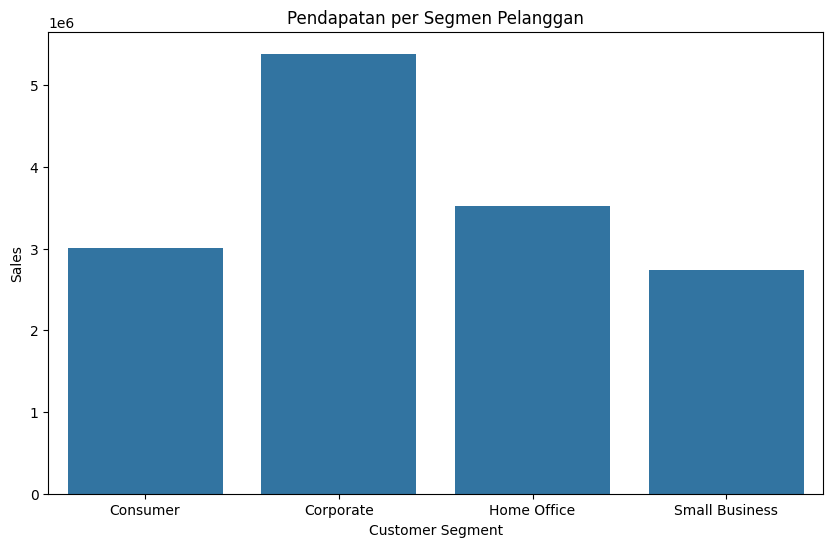

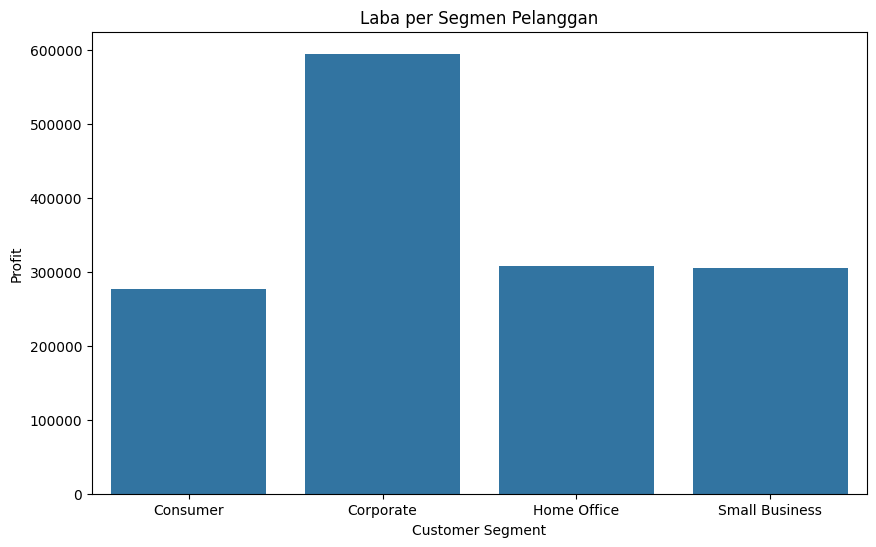

In [34]:
# Pendapatan dan laba per segmen pelanggan
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer Segment', y='Sales', data=segment_sales)
plt.title('Pendapatan per Segmen Pelanggan')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Customer Segment', y='Profit', data=segment_profit)
plt.title('Laba per Segmen Pelanggan')
plt.xlabel('Customer Segment')
plt.ylabel('Profit')
plt.show()

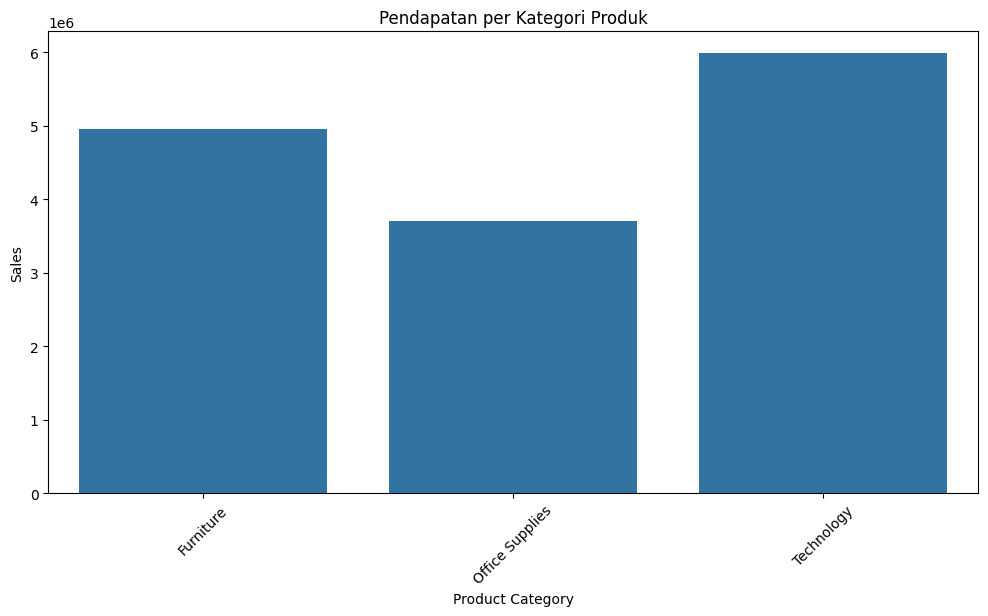

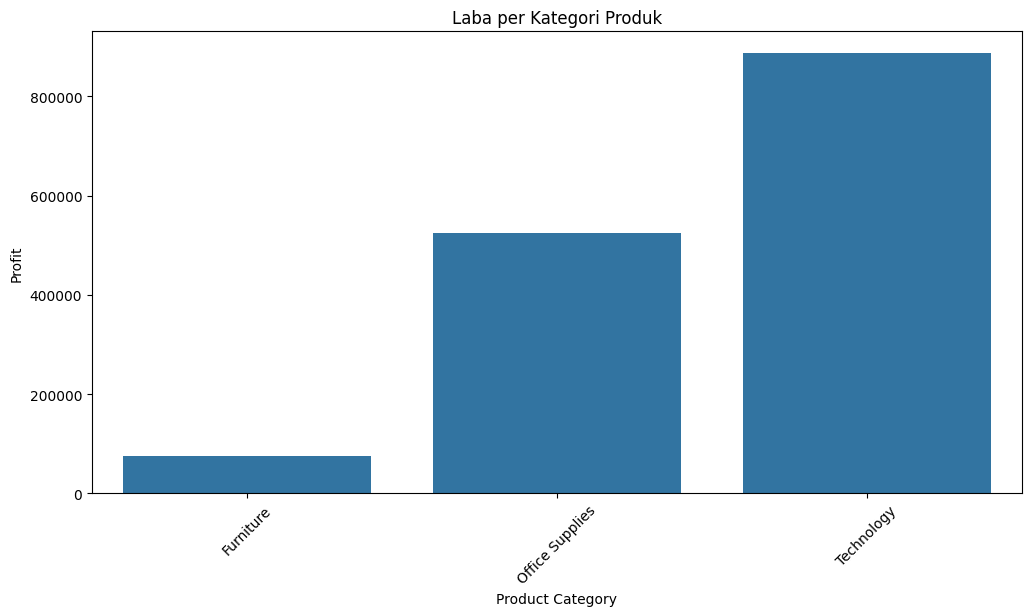

In [35]:
# Pendapatan dan laba per kategori produk
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Category', y='Sales', data=category_sales)
plt.title('Pendapatan per Kategori Produk')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Product Category', y='Profit', data=category_profit)
plt.title('Laba per Kategori Produk')
plt.xlabel('Product Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

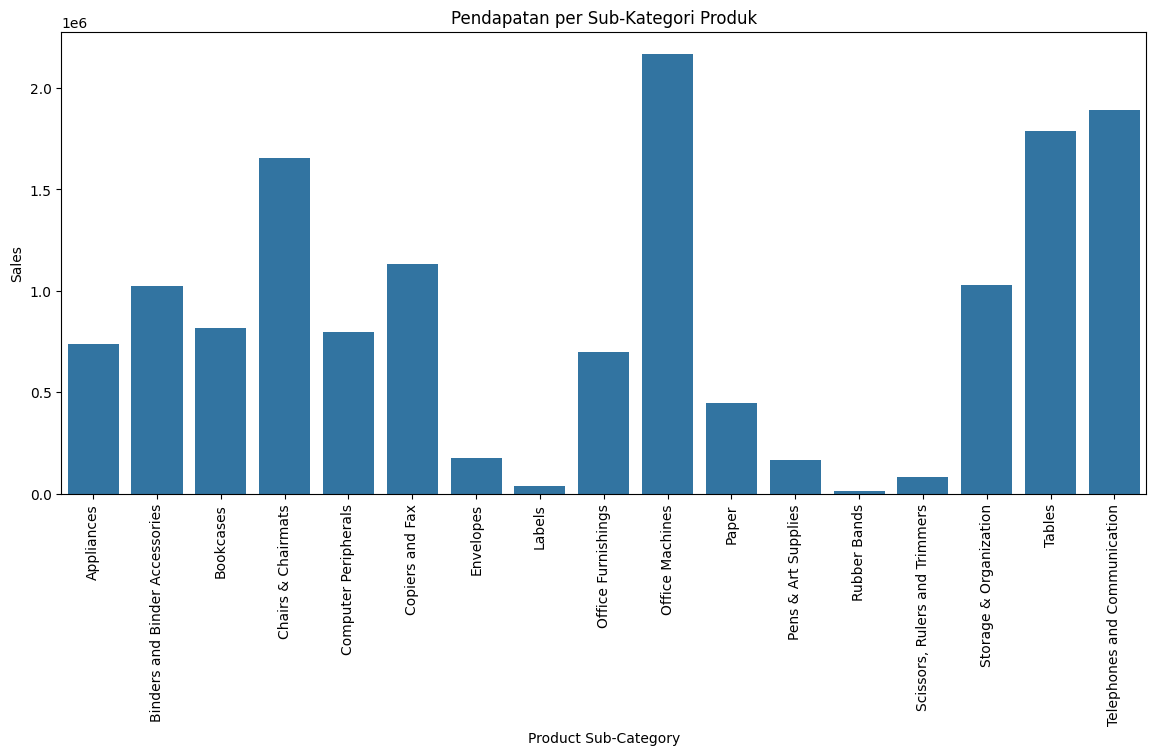

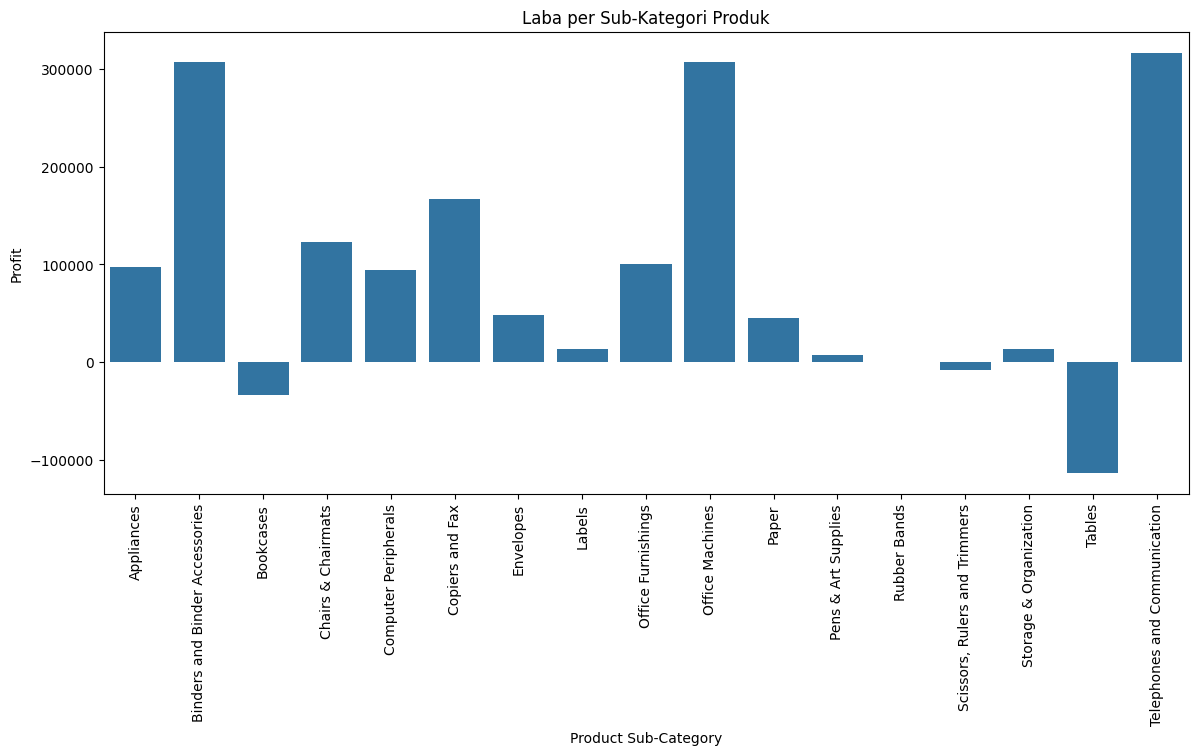

In [36]:
# Pendapatan dan laba per sub-kategori produk
plt.figure(figsize=(14, 6))
sns.barplot(x='Product Sub-Category', y='Sales', data=subcategory_sales)
plt.title('Pendapatan per Sub-Kategori Produk')
plt.xlabel('Product Sub-Category')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x='Product Sub-Category', y='Profit', data=subcategory_profit)
plt.title('Laba per Sub-Kategori Produk')
plt.xlabel('Product Sub-Category')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.show()

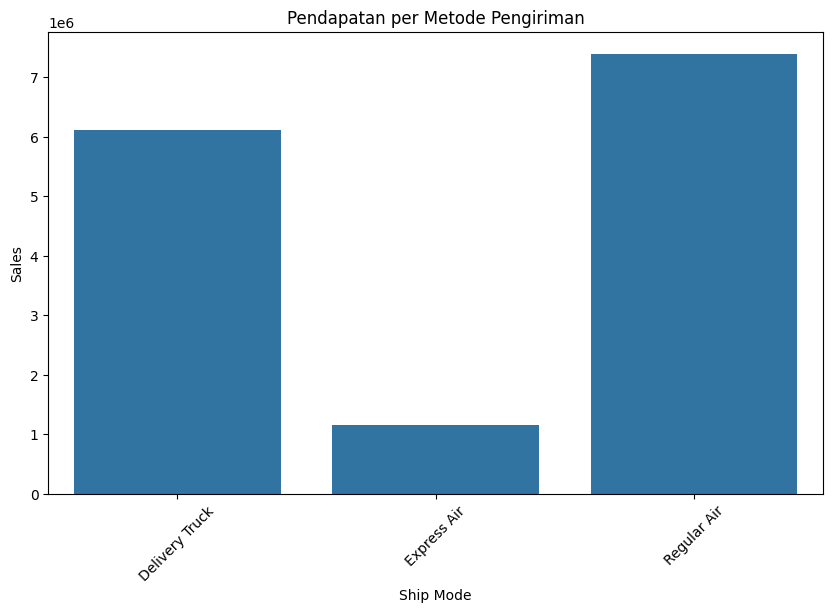

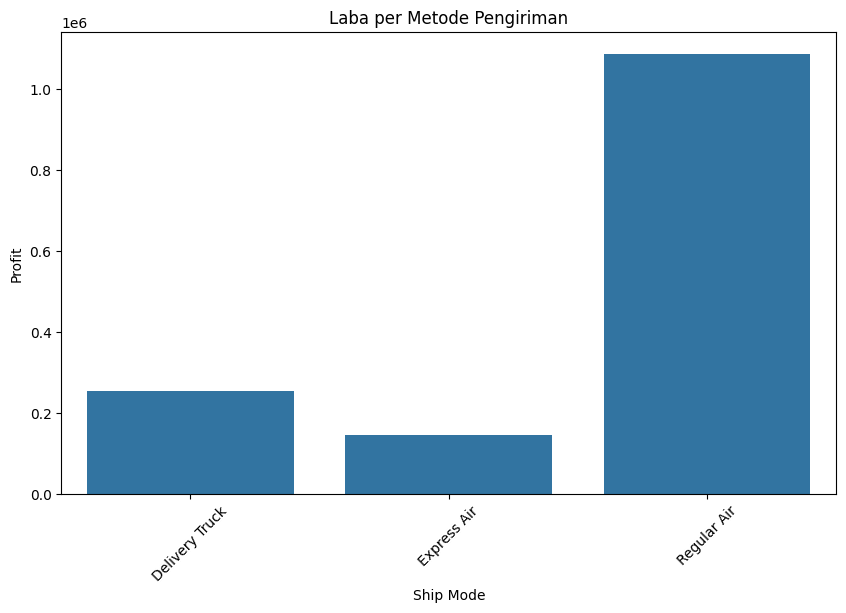

In [37]:
# Pendapatan dan laba per metode pengiriman
plt.figure(figsize=(10, 6))
sns.barplot(x='Ship Mode', y='Sales', data=ship_mode_sales)
plt.title('Pendapatan per Metode Pengiriman')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Ship Mode', y='Profit', data=ship_mode_profit)
plt.title('Laba per Metode Pengiriman')
plt.xlabel('Ship Mode')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

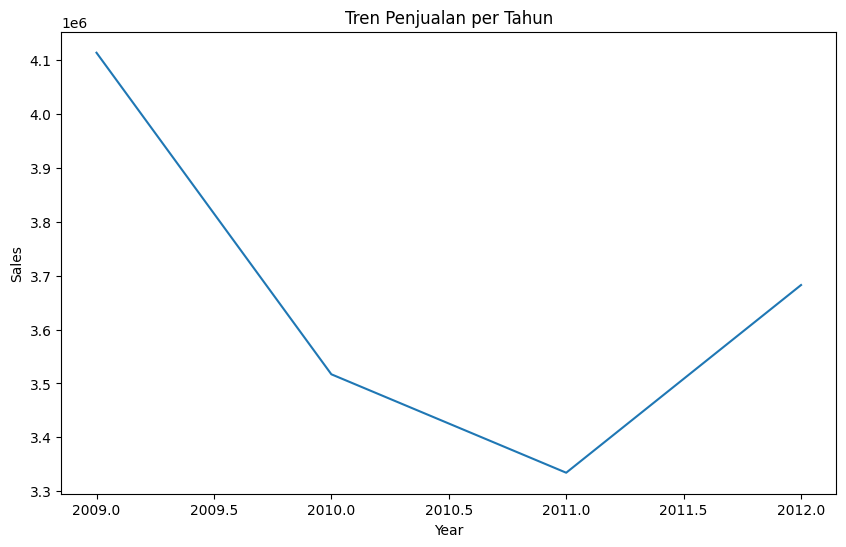

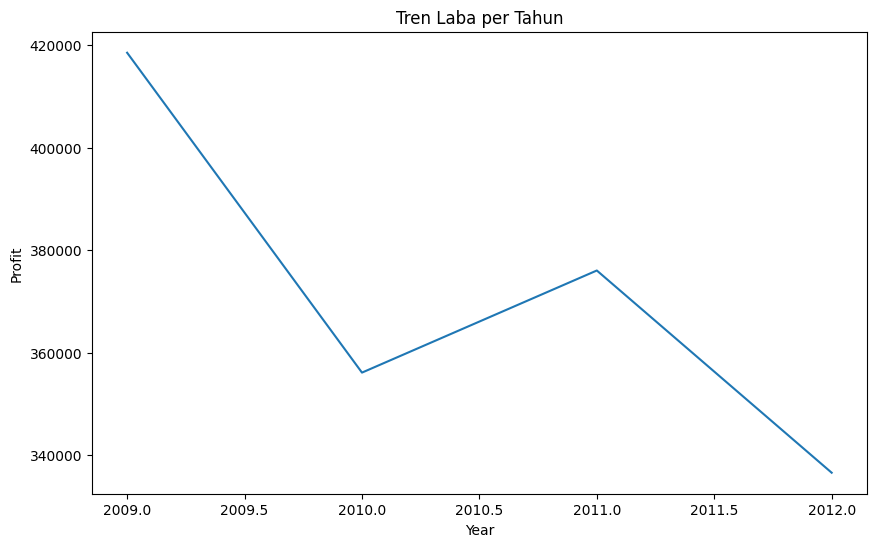

In [38]:
# Tren penjualan per tahun
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Sales', data=yearly_sales)
plt.title('Tren Penjualan per Tahun')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Profit', data=yearly_profit)
plt.title('Tren Laba per Tahun')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.show()

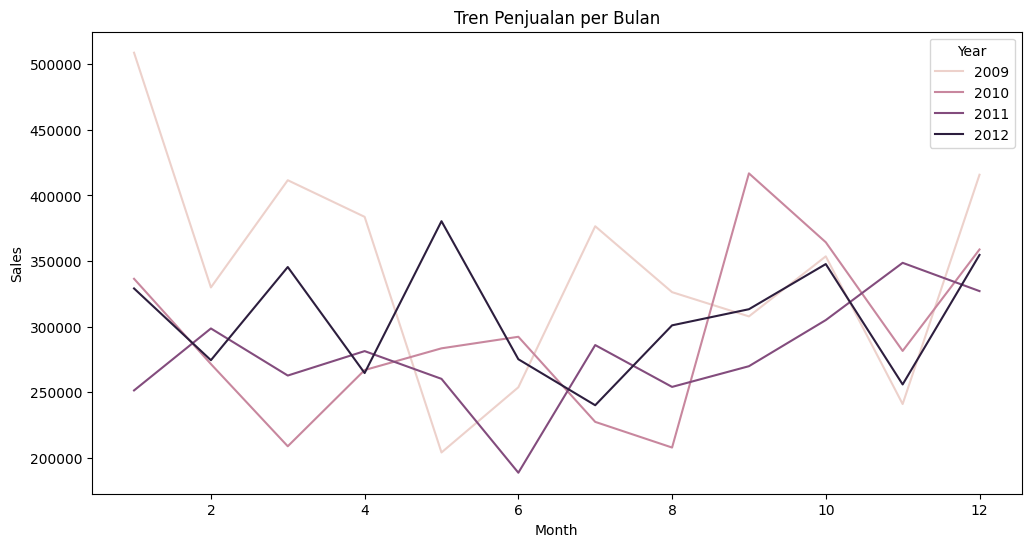

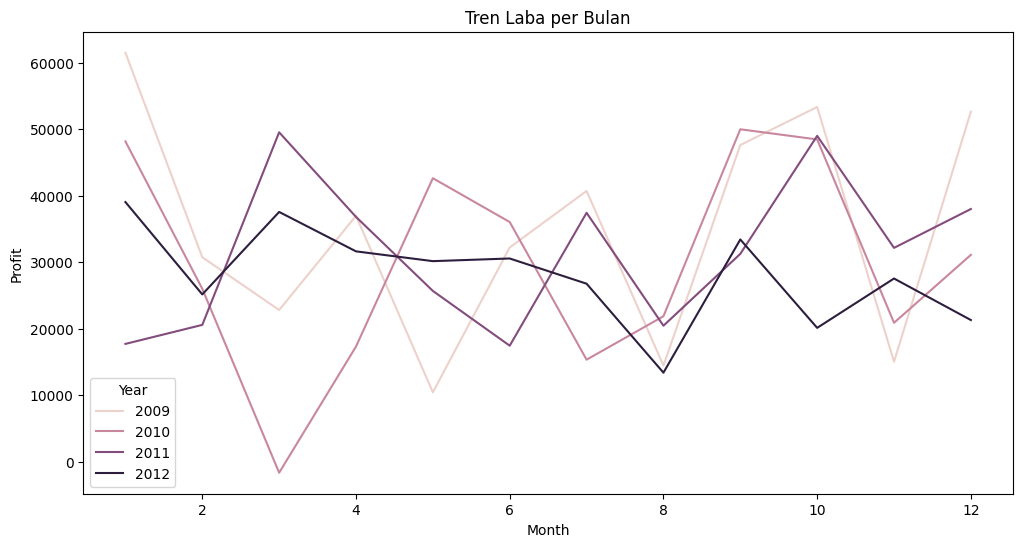

In [39]:
# Tren penjualan per bulan
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', hue='Year', data=monthly_sales)
plt.title('Tren Penjualan per Bulan')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Profit', hue='Year', data=monthly_profit)
plt.title('Tren Laba per Bulan')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.show()